# 2/12/21 - First model G3575500 (LinKS 1906)

In [1]:
### libraries
%matplotlib inline
# set workspace path
from pyprojroot import here
workspace_path = str(here())#'/data/sknabel/autolens_workspace'
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import matplotlib.pyplot as plt
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.stats import sigma_clip as clip
from os import path
import time

# set datetime variable
datetime = time.strftime("%d%m%Y-%H%M%S")

# paths
autoz_path = '/data/sknabel/autoz_lens_model/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'
object_folder = f'{fits_path}G3575500_1906/'


Bad key "text.kerning_factor" on line 4 in
/soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


/data/sknabel/autoz_lens_model
Working Directory has been set to `/data/sknabel/autoz_lens_model`


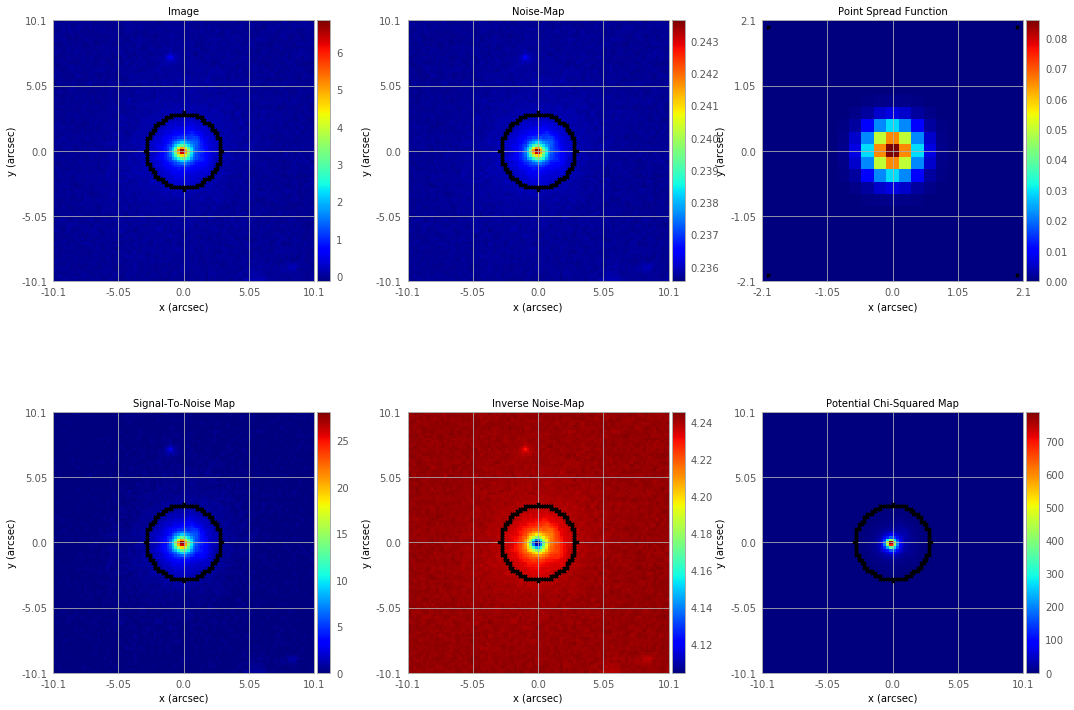

In [4]:
imaging = al.Imaging.from_fits(image_path=path.join(object_folder, '1906_r_image.fits'),
                              noise_map_path=path.join(object_folder, '1906_r_noisemap.fits'),
                              psf_path=path.join(object_folder, '1906_r_psf_resized.fits'),
                               pixel_scales=0.2)
mask = al.Mask2D.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=2, radius=3.0
)
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging, visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter.subplot_imaging()

In [8]:
# set up grid and settings
settings_masked_imaging = al.SettingsMaskedImaging(grid_class=al.Grid)#, psf_shape_2d=imaging.psf.shape_2d)
settings = al.SettingsPhaseImaging(settings_masked_imaging=settings_masked_imaging)

In [9]:
#set up lens and source - can I not use a source and just fit the lens?
lens = al.GalaxyModel(
    redshift=0.232537, bulge=al.lp.EllipticalSersic#, mass=al.mp.EllipticalIsothermal
)
#source = al.GalaxyModel(
#    redshift=0.365195, bulge=al.lp.SphericalExponential)

In [10]:
# set priors
# lens position
#lens.mass.centre_0 = af.UniformPrior(lower_limit=-1, upper_limit=1)
#lens.mass.centre_1 = af.UniformPrior(lower_limit=-1, upper_limit=1)
lens.bulge.centre_0 = af.UniformPrior(lower_limit=-0.1, upper_limit=0.1)
lens.bulge.centre_1 = af.UniformPrior(lower_limit=-0.1, upper_limit=0.1)
# einstein radius
#lens.mass.einstein_radius = af.GaussianPrior(mean=1.0, sigma=0.3)
# effective radius
lens.bulge.effective_radius = af.UniformPrior(lower_limit=0.0, upper_limit=3.0)
# source position
#source.bulge.centre_0 = af.UniformPrior(lower_limit=-1, upper_limit=1)
#source.bulge.centre_1 = af.UniformPrior(lower_limit=-1, upper_limit=1)
#source.bulge.effective_radius = af.UniformPrior(lower_limit=0.0, upper_limit=1.0)

In [11]:
# set up phase
phase = al.PhaseImaging(
    search=af.DynestyStatic(
        path_prefix="G3575500", name=f"r_fit_{datetime}", n_live_points=80
    ),
    settings=settings,
    galaxies=af.CollectionPriorModel(lens=lens)#, source=source)
)

In [12]:
# run phase
# run the phase
print('Phase running...')
tick = time.perf_counter()
phase_result = phase.run(dataset=imaging, mask=mask)
tock = time.perf_counter()
print(f'Work complete! Took us {tock-tick} seconds or {(tock-tick)/60} minutes.')

Phase running...


INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
INFO:root:No Dynesty samples found, beginning new non-linear search. 
162it [00:02, 32.75it/s, bound: 0 | nc: 7 | ncall: 578 | eff(%): 28.028 | loglstar:   -inf < -7274.268 <    inf | logz: -7281.356 +/-  0.418 | dlogz: 7130.855 >  0.089]      Traceback (most recent call last):
  File "/soft/anaconda3/lib/python3.7/site-packages/dynesty/dynesty.py", line 939, in __call__
    return self.func(x, *self.args, **self.kwargs)
  File "/soft/anaconda3/lib/python3.7/site-packages/autofit/non_linear/nest/abstract_nest.py", line 114, in __call__
    return self.figure_of_merit_from_parameters(parameters=parameters)
  File "/soft/anaconda3/lib/python3.7/site-packages/autofit/non_linear/nest/abstract_nest.py", line 123, in figure_of_merit_from_parameters
    return self.log_likelihood_from_parameters(parameters=parameters)
  File "/soft/anaconda3/lib/python3.7/site-packages/autofit/non_linear/ab

Exception while calling loglikelihood function:
  params: [ 7.23452348e-02  4.87657480e-01  5.01426613e+02  2.84202301e+00
 -9.06669414e-02 -9.79108884e-02  2.15698570e+00]
  args: [<ModelMapper Galaxy (centre_0, UniformPrior, lower_limit = -0.1, upper_limit = 0.1), (centre_1, UniformPrior, lower_limit = -0.1, upper_limit = 0.1), (elliptical_comps_0, GaussianPrior, mean = 0.0, sigma = 0.3), (elliptical_comps_1, GaussianPrior, mean = 0.0, sigma = 0.3), (intensity, LogUniformPrior, lower_limit = 1e-06, upper_limit = 1000000.0), (effective_radius, UniformPrior, lower_limit = 0.0, upper_limit = 3.0), (sersic_index, UniformPrior, lower_limit = 0.5, upper_limit = 8.0), None, None>, <autofit.non_linear.nest.dynesty.AbstractDynesty.Fitness object at 0x7f39f83aa5f8>]
  kwargs: {}
  exception:


KeyboardInterrupt: 

Galaxy (centre_0, GaussianPrior, mean = -0.08675775971870266, sigma = 0.05), (centre_1, GaussianPrior, mean = -0.076690531388796, sigma = 0.05), (elliptical_comps_0, GaussianPrior, mean = 0.02737911239928289, sigma = 0.2), (elliptical_comps_1, GaussianPrior, mean = 0.04901617784905836, sigma = 0.2), (intensity, GaussianPrior, mean = 0.22530674528355435, sigma = 0.11265337264177717), (effective_radius, GaussianPrior, mean = 2.911185226811026, sigma = 2.911185226811026), (sersic_index, GaussianPrior, mean = 3.5475349307355297, sigma = 1.5), None, None


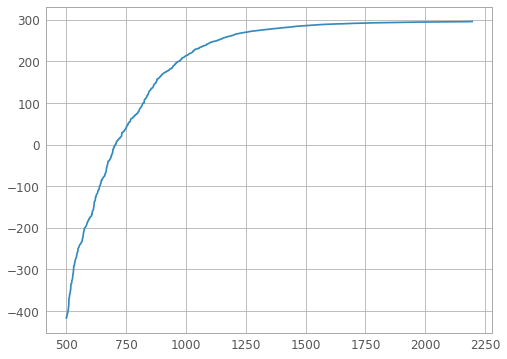

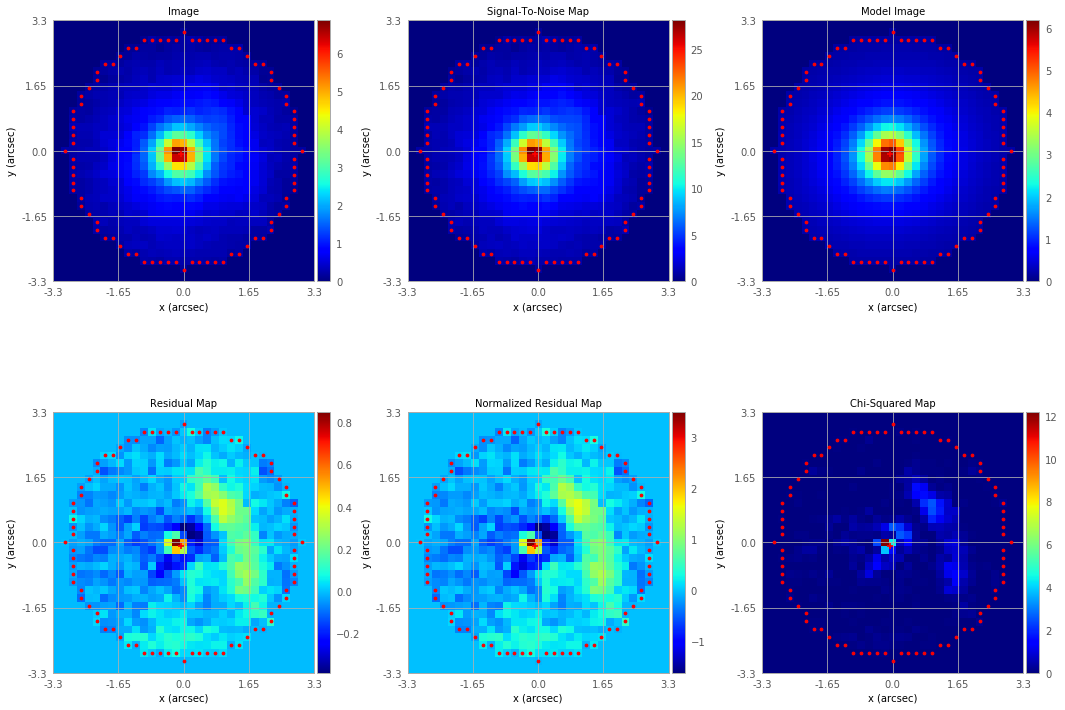

In [55]:
# print the results
print(phase_result.model)
# get samples to see how it ran?
log_likelihoods = phase_result.samples.log_likelihoods
x = np.arange(0, len(log_likelihoods), 1)
plt.plot(x[500:], log_likelihoods[500:])
plt.xlim()
# plot it!
fit_imaging_plotter = aplt.FitImagingPlotter(fit=phase_result.max_log_likelihood_fit)
fit_imaging_plotter.subplot_fit_imaging()

Aggregator loading phases... could take some time.

 A total of 5 phases and results were found.
Filter found a total of 1 results


(415.2, 2280.8)

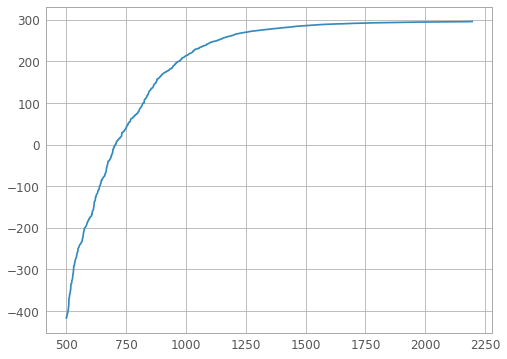

In [51]:
# This is how you can look back to find the previous results.

agg = af.Aggregator(directory="output")
agg = agg.filter(agg.directory.contains("r_fit_18022021-101851"))

"""
We get the output of the results of the model-fit performed in tutorial 1, given that is the directory we point too. 
This gives us a list with 1 entry, the list would have more entries if there were more results in the path.
"""
samples = list(agg.values("samples"))

"""
From here, we can inspect results as we please, for example printing the log likelihoods of each iteration of the phase.
"""
log_likelihoods = samples[0].log_likelihoods
x = np.arange(0, len(log_likelihoods), 1)
plt.plot(x[500:], log_likelihoods[500:])
plt.xlim()

# Now we see if we can get it to run to the g-band as priors.

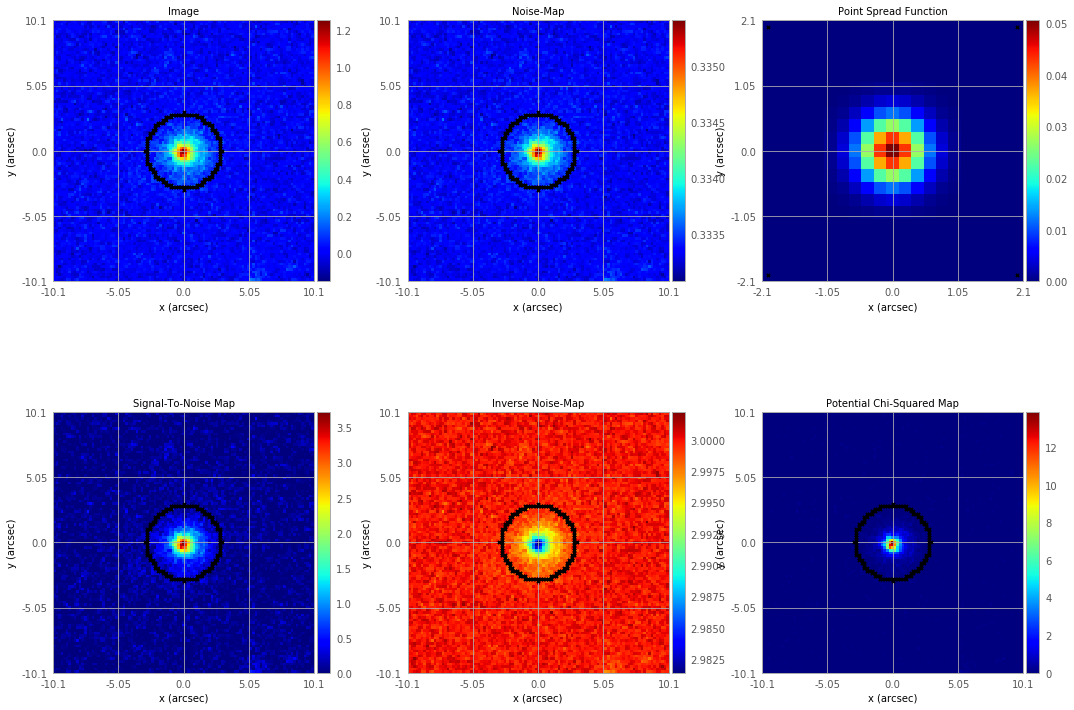

In [56]:
imaging = al.Imaging.from_fits(image_path=path.join(object_folder, '1906_g_image.fits'),
                              noise_map_path=path.join(object_folder, '1906_g_noisemap.fits'),
                              psf_path=path.join(object_folder, '1906_g_psf_resized.fits'),
                               pixel_scales=0.2)
mask = al.Mask2D.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1, radius=3.0
)
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging, visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter.subplot_imaging()

In [57]:
# let's do the fit now
# set up grid
settings_masked_imaging = al.SettingsMaskedImaging(grid_class=al.Grid)#, psf_shape_2d=imaging.psf.shape_2d)

settings = al.SettingsPhaseImaging(settings_masked_imaging=settings_masked_imaging)

In [93]:
#set up lens and source

lens_light = phase_result.model.galaxies.lens.bulge
print(lens_light)

lens = al.GalaxyModel(
    redshift=0.232537, bulge=lens_light, mass=al.mp.EllipticalIsothermal
)

source = al.GalaxyModel(
    redshift=0.365195, bulge=al.lp.SphericalExponential)

# make lens intensity default to 0.1 +- 0.1
lens.bulge.intensity = af.GaussianPrior(mean=0.05, sigma=0.05)

# make mass trace same ellipticity as light profile
lens.mass.centre_0 = lens.bulge.centre_0
lens.mass.centre_1 = lens.bulge.centre_1
lens.mass.elliptical_comps = lens.bulge.elliptical_comps

# einstein radius
lens.mass.einstein_radius = af.GaussianPrior(mean=1.0, sigma=0.3)
# source position
source.bulge.centre_0 = af.UniformPrior(lower_limit=-3, upper_limit=3)
source.bulge.centre_1 = af.UniformPrior(lower_limit=-3, upper_limit=3)
source.bulge.effective_radius = af.UniformPrior(lower_limit=0.0, upper_limit=3.0)

EllipticalSersic (centre_0, GaussianPrior, mean = -0.10554345099479862, sigma = 0.09578009216584432), (centre_1, GaussianPrior, mean = -0.050181896133002106, sigma = 0.10611863313084367), (elliptical_comps_0, GaussianPrior, mean = -0.006781437271297643, sigma = 0.2139864813083319), (elliptical_comps_1, GaussianPrior, mean = 0.04916188423669906, sigma = 0.22228784851992606), (intensity, GaussianPrior, mean = 0.05100270875924748, sigma = 0.1171429775395327), (effective_radius, GaussianPrior, mean = 3.1151596030493938, sigma = 3.1151596030493938), (sersic_index, GaussianPrior, mean = 3.5218199791482636, sigma = 1.6963838725562885)


In [94]:
# set up phase
phase2 = al.PhaseImaging(
    search=af.DynestyStatic(
        path_prefix="G3575500", name=f"g_fit_{datetime}", n_live_points=80
    ),
    settings=settings,
    galaxies=af.CollectionPriorModel(lens=lens, source=source)#, source=source)
)

In [95]:
# run phase
# run the phase
print('Phase running...')
tick = time.perf_counter()
phase_result = phase2.run(dataset=imaging, mask=mask)
tock = time.perf_counter()
print(f'Work complete! Took us {tock-tick} seconds or {(tock-tick)/60} minutes.')

INFO:root:g_fit_18022021-101851 already completed, skipping non-linear search.


Phase running...
Work complete! Took us 0.18121007457375526 seconds or 0.003020167909562588 minutes.


Galaxy (centre_0, GaussianPrior, mean = -0.10554345099479862, sigma = 0.09578009216584432), (centre_1, GaussianPrior, mean = -0.050181896133002106, sigma = 0.10611863313084367), (elliptical_comps_0, GaussianPrior, mean = -0.006781437271297643, sigma = 0.2139864813083319), (elliptical_comps_1, GaussianPrior, mean = 0.04916188423669906, sigma = 0.22228784851992606), (intensity, GaussianPrior, mean = 0.05100270875924748, sigma = 0.1171429775395327), (effective_radius, GaussianPrior, mean = 3.1151596030493938, sigma = 3.1151596030493938), (sersic_index, GaussianPrior, mean = 3.5218199791482636, sigma = 1.6963838725562885), (centre_0, GaussianPrior, mean = -0.10554345099479862, sigma = 0.09578009216584432), (centre_1, GaussianPrior, mean = -0.050181896133002106, sigma = 0.10611863313084367), (elliptical_comps_0, GaussianPrior, mean = -0.006781437271297643, sigma = 0.2139864813083319), (elliptical_comps_1, GaussianPrior, mean = 0.04916188423669906, sigma = 0.22228784851992606), (einstein_rad

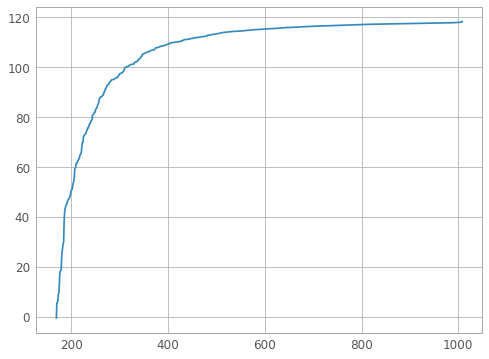

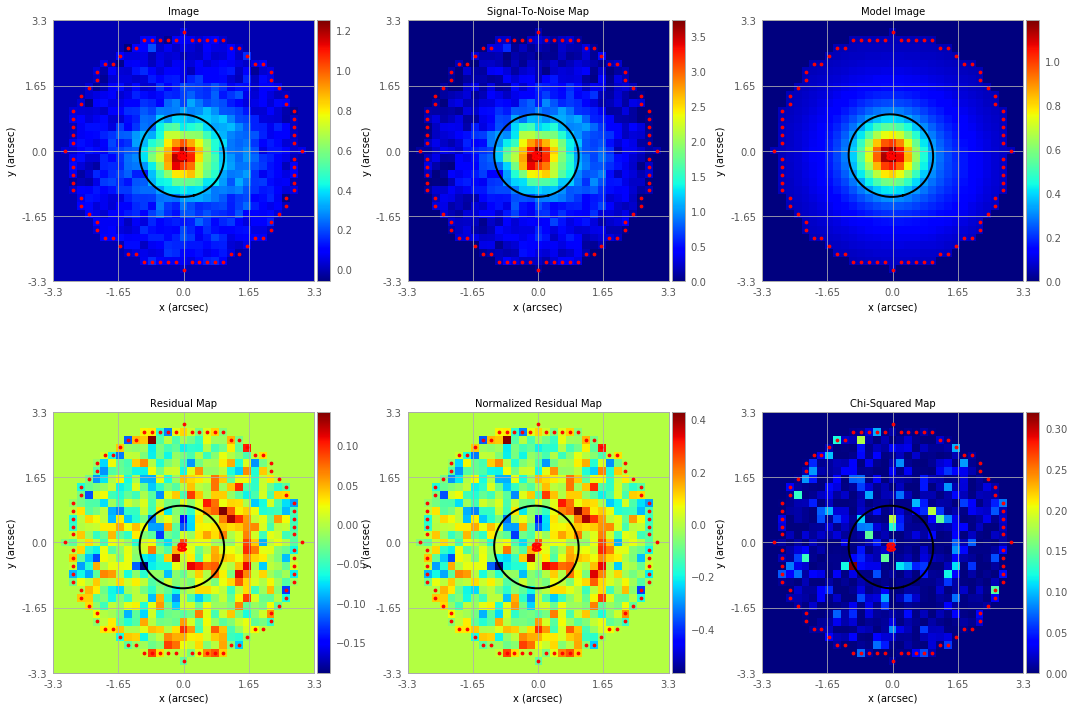

In [64]:
# print the results
print(phase_result.model)
# get samples to see how it ran?
log_likelihoods = phase_result.samples.log_likelihoods
x = np.arange(0, len(log_likelihoods), 1)
zero = (np.abs(log_likelihoods)).argmin()
plt.plot(x[zero:], log_likelihoods[zero:])
plt.xlim()
# plot it!
fit_imaging_plotter = aplt.FitImagingPlotter(fit=phase_result.max_log_likelihood_fit)
fit_imaging_plotter.subplot_fit_imaging()

In [92]:
print(phase_result.model)

Galaxy (centre_0, GaussianPrior, mean = -0.10554345099479862, sigma = 0.09578009216584432), (centre_1, GaussianPrior, mean = -0.050181896133002106, sigma = 0.10611863313084367), (elliptical_comps_0, GaussianPrior, mean = -0.006781437271297643, sigma = 0.2139864813083319), (elliptical_comps_1, GaussianPrior, mean = 0.04916188423669906, sigma = 0.22228784851992606), (intensity, GaussianPrior, mean = 0.05100270875924748, sigma = 0.1171429775395327), (effective_radius, GaussianPrior, mean = 3.1151596030493938, sigma = 3.1151596030493938), (sersic_index, GaussianPrior, mean = 3.5218199791482636, sigma = 1.6963838725562885), (centre_0, GaussianPrior, mean = -0.10554345099479862, sigma = 0.09578009216584432), (centre_1, GaussianPrior, mean = -0.050181896133002106, sigma = 0.10611863313084367), (elliptical_comps_0, GaussianPrior, mean = -0.006781437271297643, sigma = 0.2139864813083319), (elliptical_comps_1, GaussianPrior, mean = 0.04916188423669906, sigma = 0.22228784851992606), (einstein_rad

In [2]:
print(phase_result.model.result)

NameError: name 'phase_result' is not defined